# Community Housing Survey Project
This notebook is designed to do exploratory data analysis for the 2020 PhD-Community Initiative Housing
Survey dataset

Coded by Josh Moskowitz in February 2020

---




Import the relevant libraries and other setup

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup
%matplotlib inline
pd.set_option('display.max_columns', None)

Import survey data

In [13]:
survey = pd.read_excel('F:/Users/Josh/Dropbox/PhD-CI/KCH_01312020.xlsx',index_col=None,header=0)
questions = survey.iloc[0][:] # grab question wording and store for later

## Cleanup survey data

Remove unecessary rows and cols

In [14]:
survey.drop(index=[0,1],inplace=True) # remove first 2 rows
# Remove any irrelevant or personally idenitifying columns
survey.drop(labels=['Status','IPAddress','RecipientLastName','RecipientFirstName','RecipientEmail',
                    'ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel',
                    'UserLanguage','info'],axis=1,inplace=True)
survey.reset_index(drop=True, inplace=True) # reset index

Remove Whitespace and weird characters

In [15]:
def cleanDataFrame(obj):
    "Return a modified string"
    if isinstance(obj, str): # if object is a string
        return obj.replace("â€™", "'").strip() # fix apostrophes and remove trailing whitespace
    else:
        return obj

survey = survey.applymap(cleanDataFrame)

In [16]:
list(survey.columns) # check col names for plotting

['StartDate',
 'EndDate',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'consent',
 'num_applied',
 'num_applied_explain',
 'num_applied_explain_2_TEXT',
 'num_applied_explain_3_TEXT',
 'private_housing',
 'current_living_arr',
 'current_living_arr_6_TEXT',
 'why_move',
 'why_move_7_TEXT',
 'subsidy',
 'employment',
 'income_stable',
 'utilities',
 'debt',
 'mental_health',
 'substance_use',
 'gender',
 'age',
 'fam_status',
 'fam_status_5_TEXT',
 'first_nation',
 'vis_minority',
 'can_residency',
 'can_residency_3_TEXT']

## Basic demographic data

### Gender

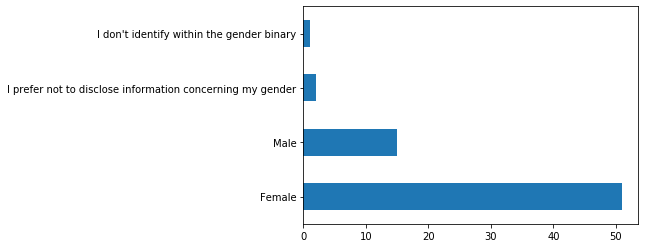

In [17]:
survey.gender.value_counts().plot(kind='barh')

### Age

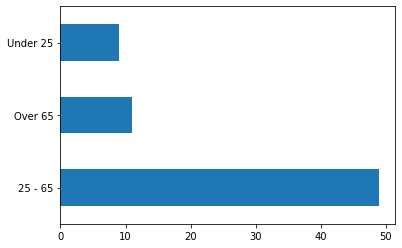

In [18]:
survey.age.value_counts().plot(kind='barh')

### Family Status

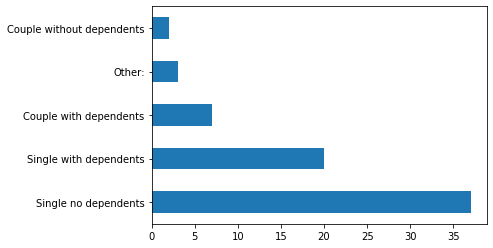

In [19]:
survey.fam_status.value_counts().plot(kind='barh')

 ## Reasons for moving

Function that will strip commas and split when a person gave multiple responses

In [20]:
def cleanWhyMove(string):
    "Split the string split into seperate responses"
    
    # remove commas from one of the possible survey responses
    # "I need to be closer to work, childcare, or social/health support services"
    if "I need to be closer to work" in string:
        idx1 = string.find("childcare") - 2
        idx2 = string.find(" or ") - 1
        cleanString = string[:idx1] + string[idx1:idx2].replace(',','') + string[idx2+1:]
    else:
        cleanString = string

    return cleanString.split(',')

Append responses to List

In [21]:
SepResp = []
for i in survey.why_move:
    if isinstance(i,str):
        SepResp.append(cleanWhyMove(i))
        
SepResp = [item for sublist in SepResp for item in sublist] # flatten list
Responses = pd.Series(SepResp,index=None) # convert to series

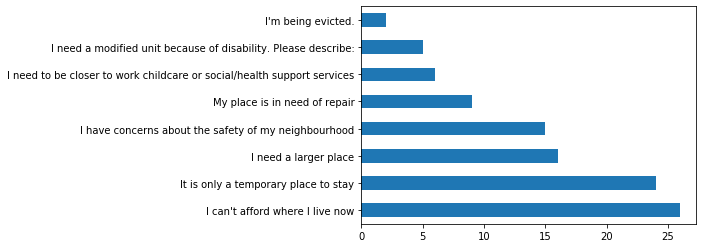

In [22]:
Responses.value_counts().plot(kind='barh')